In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

In [2]:
sys.path.append(os.path.abspath('../scripts'))

In [ ]:
from analysis import (load_and_clean_data,plot_oil_price,change_point_detection,summarize_data,apply_arima_model,apply_garch_model,
                      check_stationarity,export_results_to_markdown)

In [4]:
# Load the data (assuming the file is in the working directory)
file_path = '../data/BrentOilPrices.csv'

In [5]:
data1=load_and_clean_data(file_path)

data1=load_and_clean_data(file_path)


c:\Users\ftesfaye\Desktop\KIFIYA\KIFIYA_PROJECT_WEEK_10\TimeSeries-Change_Point_Detection\scripts\analysis.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
c:\Users\ftesfaye\Desktop\KIFIYA\KIFIYA_PROJECT_WEEK_10\TimeSeries-Change_Point_Detection\scripts\analysis.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
c:\Users\ftesfaye\Desktop\KIFIYA\KIFIYA_PROJECT_WEEK_10\TimeSeries-Change_Point_Detection\scripts\analysis.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], e

In [6]:
data1.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [7]:

data1.isna().sum()


Date     0
Price    0
dtype: int64

In [8]:
summary = summarize_data(data1)


                     Metric        Value
0                Start Date     0.000000
1                  End Date  9010.000000
2        Total Observations  9011.000000
3            Missing Values     0.000000
4                Price Mean    48.420782
5  Price Standard Deviation    32.860110
6                 Price Min     9.100000
7                 Price Max   143.950000


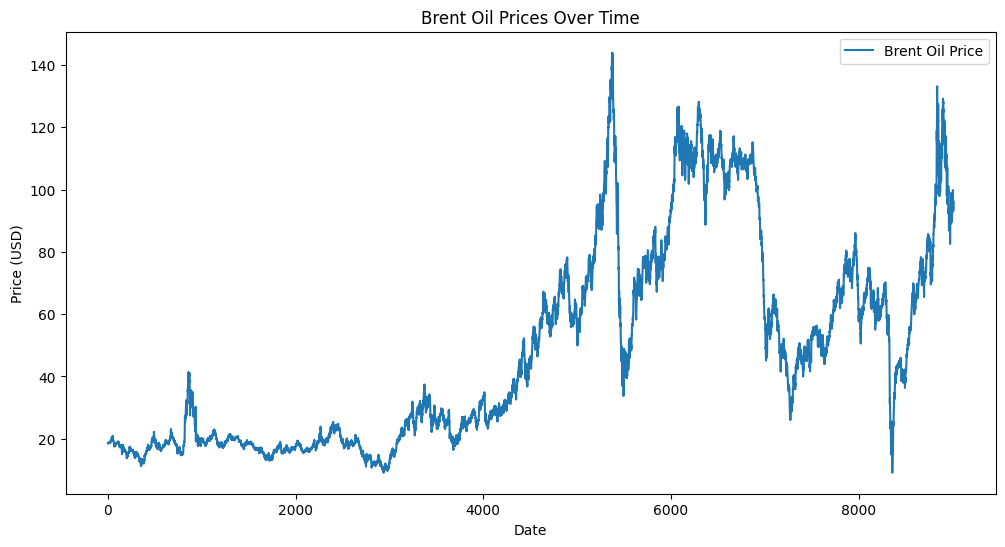

In [10]:
plot_oil_price(data1)

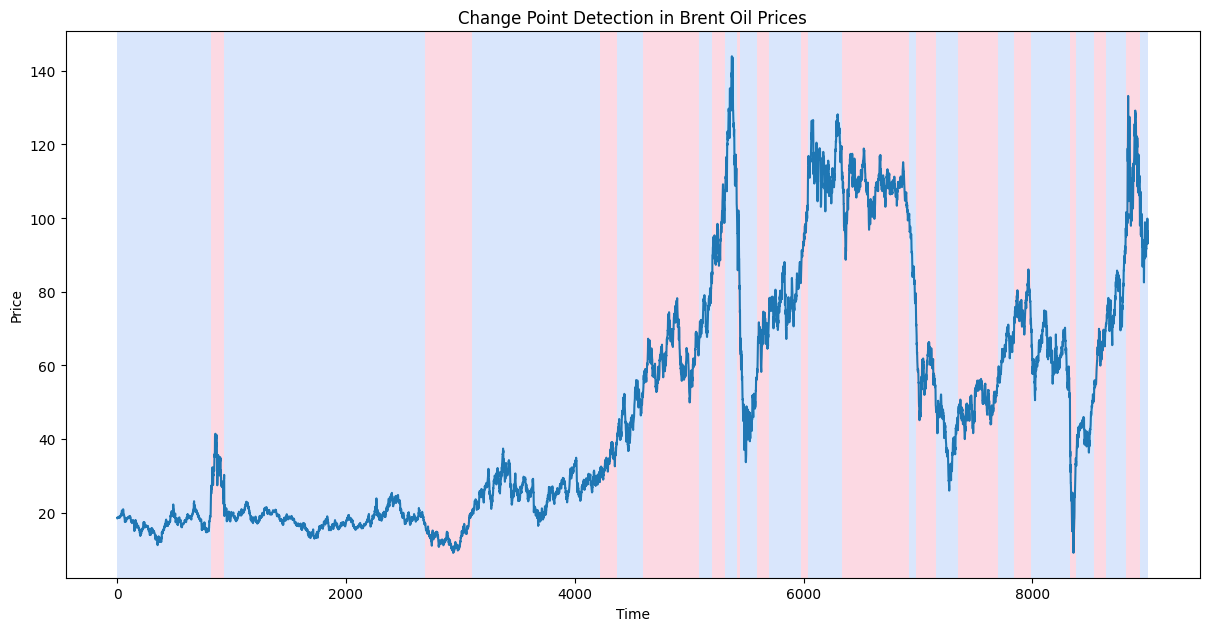

In [11]:
change_points = change_point_detection(data1)

In [12]:
apply_arima_model(data1)

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14543.950
Date:                Mon, 04 Nov 2024   AIC                          29093.899
Time:                        15:33:26   BIC                          29115.218
Sample:                             0   HQIC                         29101.153
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3427      0.159     -2.152      0.031      -0.655      -0.031
ma.L1          0.3712      0.157      2.358      0.018       0.063       0.680
sigma2         1.4777      0.008    184.571      0.0

In [13]:
apply_garch_model(data1)


Iteration:      1,   Func. Count:      6,   Neg. LLF: 3874927804.158277
Iteration:      2,   Func. Count:     12,   Neg. LLF: 70148.68734205695
Iteration:      3,   Func. Count:     19,   Neg. LLF: 924509187.1107914
Iteration:      4,   Func. Count:     27,   Neg. LLF: 44099.26204018903
Iteration:      5,   Func. Count:     33,   Neg. LLF: 41882.581755042986
Iteration:      6,   Func. Count:     39,   Neg. LLF: 41190.23335963133
Iteration:      7,   Func. Count:     46,   Neg. LLF: 40221.97253756566
Iteration:      8,   Func. Count:     52,   Neg. LLF: 38675.84139852016
Iteration:      9,   Func. Count:     58,   Neg. LLF: 46507.19984815386
Iteration:     10,   Func. Count:     64,   Neg. LLF: 52311.49939565074
Iteration:     11,   Func. Count:     73,   Neg. LLF: 39566.28900289833
Iteration:     12,   Func. Count:     79,   Neg. LLF: 37683.04414723057
Iteration:     13,   Func. Count:     85,   Neg. LLF: 38550.85348090723
Iteration:     14,   Func. Count:     91,   Neg. LLF: 48052.343

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -35221.8
Distribution:                  Normal   AIC:                           70451.5
Method:            Maximum Likelihood   BIC:                           70479.9
                                        No. Observations:                 9011
Date:                Mon, Nov 04 2024   Df Residuals:                     9010
Time:                        15:33:26   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            18.5742      0.108    172.353      0.000 [ 18.363, 18.78

In [14]:
check_stationarity(data1)


ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287


np.False_

In [15]:
export_results_to_markdown(summary)


Results exported to analysis_report.md


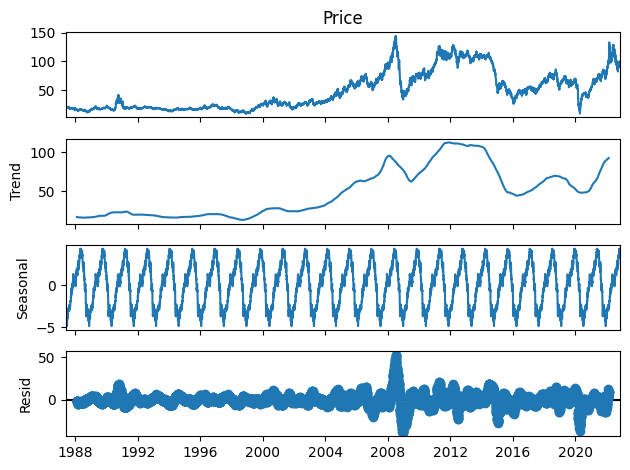

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(data1.set_index('Date')['Price'], model='additive', period=365)
result.plot()
plt.show()



In [ ]:
events = {
    '1987-10-19': 'Black Monday Stock Market Crash',
    '1990-08-02': 'Gulf War begins as Iraq invades Kuwait',
    '1991-01-17': 'Operation Desert Storm begins in Kuwait',
    '1997-07-02': 'Asian Financial Crisis begins in Southeast Asia',
    '1998-08-17': 'Russian Financial Crisis impacts global commodity markets',
    '1999-03-23': 'OPEC agrees to production cuts to counter low oil prices',
    '2001-09-11': 'September 11 Attacks in the U.S. create market uncertainty',
    '2002-12-01': 'Venezuela general strike affects oil exports',
    '2003-03-20': 'Iraq War begins, impacting Middle East oil supply routes',
    '2004-10-23': 'China’s oil demand surges, driving global price increases',
    '2005-08-29': 'Hurricane Katrina disrupts oil production in Gulf of Mexico',
    '2006-07-12': 'Israel-Lebanon conflict creates supply disruptions',
    '2007-01-01': 'Russia briefly cuts oil supply to Belarus, affecting Europe',
    '2007-10-11': 'Global Financial Crisis precursor as stock markets start decline',
    '2008-07-11': 'Oil price peaks at over $147 per barrel due to demand and speculation',
    '2008-09-15': 'Lehman Brothers collapse intensifies Global Financial Crisis',
    '2009-01-01': 'OPEC production cuts begin as a response to financial crisis',
    '2010-04-20': 'BP Deepwater Horizon oil spill in Gulf of Mexico',
    '2010-09-15': 'U.S. enacts Dodd-Frank Act impacting energy commodity speculation',
    '2011-01-25': 'Arab Spring leads to political instability across the Middle East',
    '2011-03-11': 'Japan earthquake and tsunami impacts energy demand and supply',
    '2012-07-01': 'European Union imposes oil embargo on Iran',
    '2014-02-20': 'Ukraine Crisis and sanctions on Russia affect oil supply chains',
    '2014-06-05': 'ISIS gains control of key regions in Iraq, affecting oil production',
    '2014-11-27': 'OPEC decides against production cuts despite falling prices',
    '2015-08-11': 'China devalues yuan, leading to concerns over global demand',
    '2015-11-30': 'Paris Climate Agreement affects long-term fossil fuel policies',
    '2016-01-16': 'U.S. lifts sanctions on Iran, adding oil supply back to the market',
    '2017-06-05': 'Qatar Diplomatic Crisis with neighboring Gulf states',
    '2017-08-25': 'Hurricane Harvey impacts oil production and refining in Texas',
    '2018-05-08': 'U.S. withdraws from Iran nuclear deal, reimposing sanctions',
    '2018-11-04': 'Full U.S. sanctions on Iranian oil exports come into effect',
    '2019-09-14': 'Drone attacks on Saudi Aramco facilities disrupt oil supply',
    '2020-03-09': 'OPEC+ price war between Russia and Saudi Arabia',
    '2020-03-11': 'WHO declares COVID-19 a pandemic, global lockdowns ensue',
    '2020-04-20': 'West Texas Intermediate oil price turns negative due to oversupply',
    '2021-02-15': 'Texas Winter Storm disrupts oil production in the U.S.',
    '2021-06-30': 'OPEC+ agreement on gradual production increase as demand recovers',
    '2021-08-15': 'Taliban takes control of Afghanistan, increasing regional instability',
    '2022-02-24': 'Russia invades Ukraine, triggering sanctions on Russian oil',
    '2022-06-08': 'EU announces phased oil embargo on Russia amid Ukraine crisis',
}
# Convert the events dictionary to a DataFrame
events_df = pd.DataFrame(list(events.items()), columns=['Date', 'Event'])



In [ ]:
# Convert the 'Date' columns to datetime format in both DataFrames
df['Date'] = pd.to_datetime(df['Date'])
events_df['Date'] = pd.to_datetime(events_df['Date'])

# Merge the events DataFrame with the main DataFrame on 'Date'
df = pd.merge(df, events_df, on='Date', how='left')

# Display the first few rows of the merged DataFrame to confirm the merge
print(df.head())

C:\Users\ftesfaye\AppData\Local\Temp\ipykernel_5704\922226041.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


        Date  Price Event
0 2002-04-01  26.06   NaN
1 2003-04-01  27.94   NaN
2 2004-04-01  32.59   NaN
3 2005-04-01  54.14   NaN
4 2008-04-01  98.69   NaN


In [ ]:
# Filter the DataFrame to include only rows with events
events_only_df = df[df['Event'].notna()]

# Display the resulting DataFrame
print(events_only_df)


           Date   Price                                              Event
288  1990-08-02   22.25             Gulf War begins as Iraq invades Kuwait
380  1997-07-02   18.83    Asian Financial Crisis begins in Southeast Asia
1212 2014-06-05  108.43  ISIS gains control of key regions in Iraq, aff...
1214 2017-06-05   48.25  Qatar Diplomatic Crisis with neighboring Gulf ...
2095 2018-05-08   74.16  U.S. withdraws from Iran nuclear deal, reimpos...
2349 2020-03-09   35.33    OPEC+ price war between Russia and Saudi Arabia
2767 2015-08-11   47.33  China devalues yuan, leading to concerns over ...
2858 2008-07-11  143.68  Oil price peaks at over $147 per barrel due to...
2905 2011-03-11  114.07  Japan earthquake and tsunami impacts energy de...
2911 2020-03-11   34.45  WHO declares COVID-19 a pandemic, global lockd...
2972 2007-10-11   80.83  Global Financial Crisis precursor as stock mar...
2991 2001-09-11   29.12  September 11 Attacks in the U.S. create market...
3136 2006-07-12   73.04  

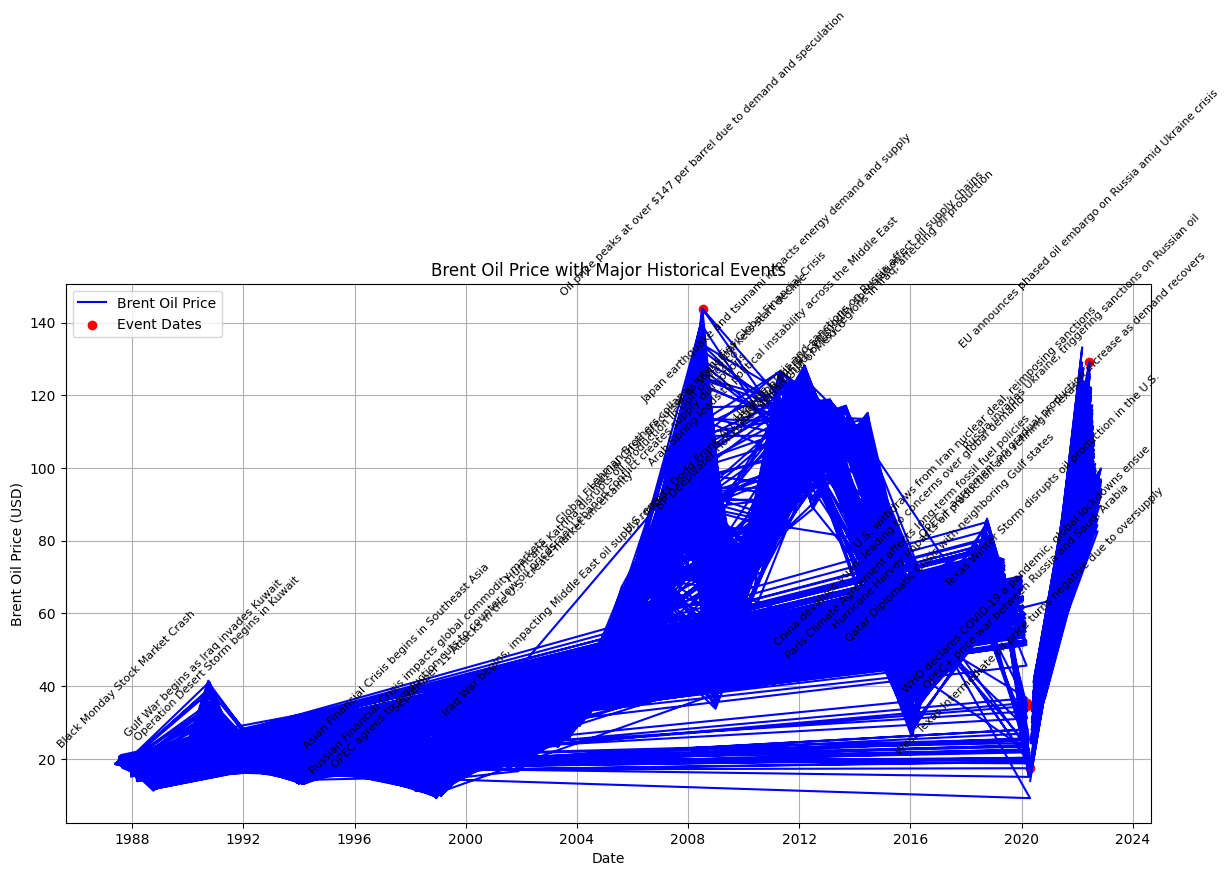

In [ ]:
import matplotlib.pyplot as plt

# Line plot for Brent oil prices
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price', color='blue')

# Highlight event dates on the line graph
events_only_df = df[df['Event'].notna()]
plt.scatter(events_only_df['Date'], events_only_df['Price'], color='red', marker='o', label='Event Dates')

# Annotate events on the graph
for i, row in events_only_df.iterrows():
    plt.annotate(row['Event'], (row['Date'], row['Price']),
                 textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, rotation=45)

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('Brent Oil Price (USD)')
plt.title('Brent Oil Price with Major Historical Events')
plt.legend()
plt.grid()

plt.show()


In [19]:
import pandas as pd
import numpy as np
import datetime

def create_synthetic_data(file_name, start_date='2000-05-20', end_date='2022-12-31'):
    date_range = pd.date_range(start=start_date, end=end_date, freq='M')
    data = pd.DataFrame({
        'Date': date_range,
        'GDP': np.random.normal(50000, 1000, len(date_range)),       # Example values in billions
        'Inflation': np.random.uniform(0, 10, len(date_range)),       # Example inflation rate in %
        'ExchangeRate': np.random.normal(1.5, 0.1, len(date_range))   # Example exchange rate, assuming USD as base
    })
    
    # Save individual files
    data[['Date', 'GDP']].to_csv('GDP.csv', index=False)
    data[['Date', 'Inflation']].to_csv('Inflation.csv', index=False)
    data[['Date', 'ExchangeRate']].to_csv('ExchangeRate.csv', index=False)

# Run the function to create the files
create_synthetic_data('synthetic_data')


C:\Users\ftesfaye\AppData\Local\Temp\ipykernel_7012\705383379.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=start_date, end=end_date, freq='M')
